#1. Linear regression with gradient decent

In [491]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [492]:
# Load housing dataset
df= pd.read_csv("housing.csv")
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [493]:
df.tail()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
541,91500,4800,3,2,4,yes,yes,no,no,yes,0,no
542,94000,6000,3,2,4,yes,no,no,no,yes,0,no
543,103000,6000,3,2,4,yes,yes,no,no,yes,1,no
544,105000,6000,3,2,2,yes,yes,no,no,yes,1,no
545,105000,6000,3,1,2,yes,no,no,no,yes,1,no


In [494]:
df.shape

(546, 12)

Dataset has 546 rows and 12 columns

In [495]:
df.describe()

,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,3.000000


In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     546 non-null    int64 
 1   lotsize   546 non-null    int64 
 2   bedrooms  546 non-null    int64 
 3   bathrms   546 non-null    int64 
 4   stories   546 non-null    int64 
 5   driveway  546 non-null    object
 6   recroom   546 non-null    object
 7   fullbase  546 non-null    object
 8   gashw     546 non-null    object
 9   airco     546 non-null    object
 10  garagepl  546 non-null    int64 
 11  prefarea  546 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.3+ KB


In [497]:
df.isnull().sum()

,0
price,0
lotsize,0
bedrooms,0
bathrms,0
stories,0
driveway,0
recroom,0
fullbase,0
gashw,0
airco,0


Since, there is no missing value in any column, no imputation is required in our dataset.

In [498]:
# Target Variable
y = df['price']

# Feature variables
X = df.drop(columns=['price'])

In [499]:
X['driveway'].unique()

array(['yes', 'no'], dtype=object)

In [500]:
X['recroom'].unique()

array(['no', 'yes'], dtype=object)

In [501]:
X['fullbase'].unique()

array(['yes', 'no'], dtype=object)

In [502]:
X['gashw'].unique()

array(['no', 'yes'], dtype=object)

In [503]:
X['airco'].unique()

array(['no', 'yes'], dtype=object)

In [504]:
X['prefarea'].unique()

array(['no', 'yes'], dtype=object)

Since, all the categorical columns are binary i.e. all the columns have either 'yes' or 'no' values, we will apply binary encoding also known as label encoding to map into numerical values which is:

yes=1
,no=0

In [505]:
# List of categorical columns
categorical_cols = ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']

# Convert 'yes'/'no' to 1/0
for col in categorical_cols:
    X[col] = X[col].map({'yes': 1, 'no': 0})

print(X[categorical_cols].head())


   driveway  recroom  fullbase  gashw  airco  prefarea
0         1        0         1      0      0         0
1         1        0         0      0      0         0
2         1        0         0      0      0         0
3         1        1         0      0      0         0
4         1        0         0      0      0         0


In [506]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   lotsize   546 non-null    int64
 1   bedrooms  546 non-null    int64
 2   bathrms   546 non-null    int64
 3   stories   546 non-null    int64
 4   driveway  546 non-null    int64
 5   recroom   546 non-null    int64
 6   fullbase  546 non-null    int64
 7   gashw     546 non-null    int64
 8   airco     546 non-null    int64
 9   garagepl  546 non-null    int64
 10  prefarea  546 non-null    int64
dtypes: int64(11)
memory usage: 47.0 KB


In [507]:
X.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,5850,3,1,2,1,0,1,0,0,1,0
1,4000,2,1,1,1,0,0,0,0,0,0
2,3060,3,1,1,1,0,0,0,0,0,0
3,6650,3,1,2,1,1,0,0,0,0,0
4,6360,2,1,1,1,0,0,0,0,0,0


In [508]:
# Normalize the features
X_normalized = (X - X.mean()) / X.std()

# Add a column of ones to X_normalized for the bias term
X_normalized.insert(0, 'bias', 1)

In [509]:
X_normalized.head()

,bias,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,0.322732,0.047192,-0.568973,0.221501,0.404819,-0.464371,1.362070,-0.218853,-0.68041,0.357239,-0.552865
1,1,-0.530526,-1.308947,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.68041,-0.803788,-0.552865
2,1,-0.964074,0.047192,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.68041,-0.803788,-0.552865
3,1,0.691709,0.047192,-0.568973,0.221501,0.404819,2.149509,-0.732832,-0.218853,-0.68041,-0.803788,-0.552865
4,1,0.557955,-1.308947,-0.568973,-0.930304,0.404819,-0.464371,-0.732832,-0.218853,-0.68041,-0.803788,-0.552865


In [510]:
# Convert to NumPy arrays
X_numpy = X_normalized.values
y_numpy = y.values.reshape(-1, 1)


In [511]:
X_numpy

array([[ 1.        ,  0.32273211,  0.04719162, ..., -0.68040981,
         0.35723902, -0.55286459],
       [ 1.        , -0.53052646, -1.30894664, ..., -0.68040981,
        -0.80378779, -0.55286459],
       [ 1.        , -0.96407405,  0.04719162, ..., -0.68040981,
        -0.80378779, -0.55286459],
       ...,
       [ 1.        ,  0.39191523,  0.04719162, ...,  1.46701074,
         0.35723902, -0.55286459],
       [ 1.        ,  0.39191523,  0.04719162, ...,  1.46701074,
         0.35723902, -0.55286459],
       [ 1.        ,  0.39191523,  0.04719162, ...,  1.46701074,
         0.35723902, -0.55286459]])

#1-1

In [512]:
# Gradient Descent Function
def computeCost(X, y, w):
  """
  Compute the cost J:
  𝐽 = 1/𝑚 ∑(𝑦𝑖̂ − 𝑦𝑖)2

  """
  m = len(y)
  predictions = X.dot(w) # 𝑦𝑖̂
  errors = (predictions - y) ** 2  # Squared errors
  cost = (1/(m)) * np.sum(errors)
  return cost

In [513]:
# Gradient Descent Function
def gradientDescent(X, y, w, alpha, epochs):
    m = len(y)
    cost_history = []
    rmse_history = []

    for epoch in range(epochs):
        # Predictions
        predictions = X.dot(w)

        # Calculate the gradients
        gradients = (2 / m) * X.T.dot(predictions - y)

        """
        Update weights
        𝑊𝑗𝑡: = 𝑊𝑗𝑡−1 − 𝛼 𝜕𝐽/𝜕𝑊

        """
        w = w - alpha * gradients

        # Calculate cost
        cost = computeCost(X, y, w)

        # Calculate RMSE
        rmse = np.sqrt((1 / m) * np.sum((predictions - y) ** 2))

        # Store cost and RMSE
        cost_history.append(cost)
        rmse_history.append(rmse)

        # Print cost, RMSE, and updated weights for each epoch
        print(f"Epoch {epoch + 1}: Cost = {cost:.4f}, RMSE = {rmse:.4f} ")
        print(f"\nUpdated Weights = {w.T}")
        print("--"*50)

    return w, cost_history, rmse_history


In [514]:
# Hyperparameters
alpha = 0.2  # learning rate
epochs = 10    # number of iterations (epochs)

n = X_numpy.shape
w = np.zeros((X_numpy.shape[1], 1))  # Initialize weights as zeros

# Gradient Descent Execution
optimal_weights, cost_history, rmse_history = gradientDescent(X_numpy, y_numpy, w, alpha, epochs)

Epoch 1: Cost = 1917693797.7815, RMSE = 73159.2694 

Updated Weights = [[27248.63882784  5712.3887625   3906.88070357  5509.00541795
   4490.52214816  3168.24580436  2718.25274867  1985.36082148
    989.77737527  4833.35707983  4086.57647916  3508.42784006]]
----------------------------------------------------------------------------------------------------
Epoch 2: Cost = 840923582.3720, RMSE = 43791.4809 

Updated Weights = [[43597.82212454  6446.55729378  3539.36673216  6176.08168262
   4875.21799274  3173.42475316  2591.31680948  2049.41843882
   1598.27097579  5358.41367309  4250.76615036  3780.65833174]]
----------------------------------------------------------------------------------------------------
Epoch 3: Cost = 453028162.9233, RMSE = 28998.6824 

Updated Weights = [[53407.33210256  6757.79377365  3050.96908402  6455.00482309
   4987.63068913  3009.28186777  2389.51893877  2067.43729473
   1981.19966623  5551.98840539  4152.99663077  3849.30994606]]
-----------------------

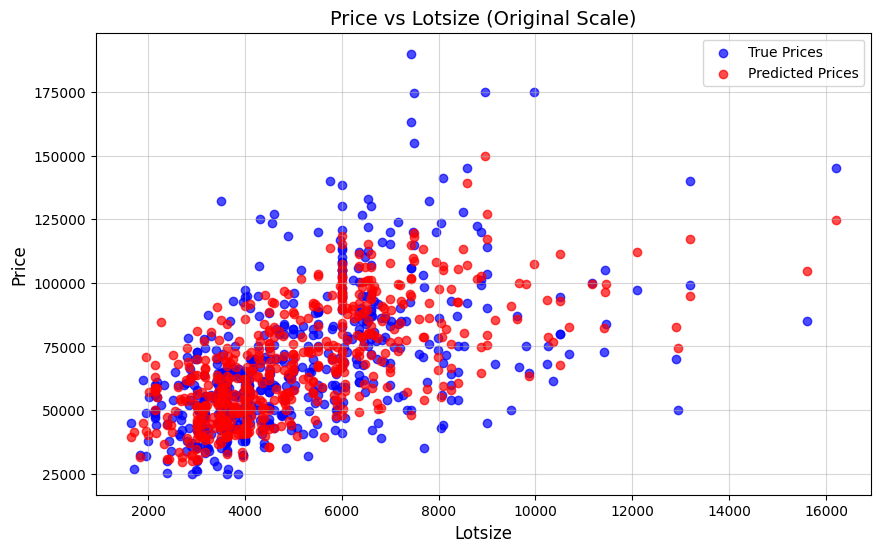

In [515]:
# Predictions
y_pred = X_numpy.dot(optimal_weights)

# Price vs Lotsize in Original Scale
plt.figure(figsize=(10, 6))
plt.scatter(X['lotsize'], y, color='blue', alpha=0.7, label="True Prices")

# Predicted Prices
plt.scatter(X['lotsize'], y_pred, color='red', alpha=0.7, label="Predicted Prices")

plt.title("Price vs Lotsize (Original Scale)", fontsize=14)
plt.xlabel("Lotsize", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.5)
plt.show()

In [516]:
y_pred.shape

(546, 1)

In [517]:
y.shape

(546,)

In [518]:
# since the shape of y(1D) and y_pred(2D) is different, converting y_pred to 1D array
y_pred = y_pred.flatten()

# Compute R² Score
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r2_score = 1 - (ss_residual / ss_total)
print(f"R² Score: {r2_score:.4f}")


R² Score: 0.6727


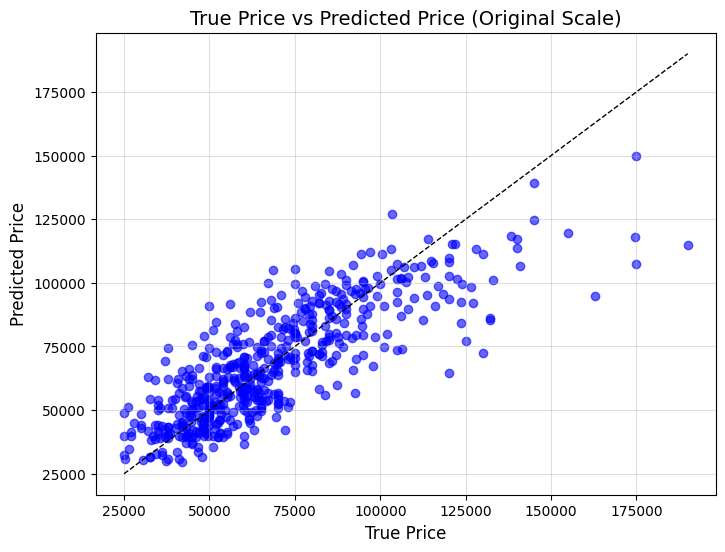

In [519]:
# True Price(y) vs Predicted Price(y_pred) in Original Scale
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.6, color='blue')

# Line of perfect prediction (y = y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='black', linewidth=1)

plt.title("True Price vs Predicted Price (Original Scale)", fontsize=14)
plt.xlabel("True Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)
plt.grid(alpha=0.4)
plt.show()


#1-2

In [520]:
def cost_compute(X, y, w):
    """
    J = (1/m) * (Ŷ - Y)^T * (Ŷ - Y)
    """
    m = len(y)
    predictions = X.dot(w) # Predicted values (Ŷ)
    error = predictions - y
    cost = (1 / m) * (error.T.dot(error)) # Mean squared error
    return float(cost)

In [521]:
def gradient_Descent(X, y, w, alpha, epochs):
    m = len(y)
    cost_history = []
    rmse_history = []

    for epoch in range(epochs):
        predictions = X.dot(w)  # Ŷ = XW

        # Compute the gradient
        error = predictions - y  # (Ŷ - Y)
        gradient = (1 / m) * X.T.dot(error)  # ∇W = (1/m) * X^T * (Ŷ - Y)

        # Update weights: W = W - α * ∇W
        w -= alpha * gradient

        # Compute cost
        cost = cost_compute(X, y, w)
        cost_history.append(cost)

        # Compute RMSE
        rmse = np.sqrt(cost)  # RMSE = sqrt(J)
        rmse_history.append(rmse)

        # Print cost and RMSE for each epoch
        print(f"Epoch {epoch + 1}: Cost = {cost:.4f}, RMSE = {rmse:.4f}")
        print(f"\nUpdated Weights = {w.T}")
        print("--"*50)

    return w, cost_history, rmse_history


In [522]:
# Hyperparameters
alpha = 0.1  # learning rate
epochs = 10    # number of iterations (epochs)

n = X_numpy.shape
w = np.zeros((X_numpy.shape[1], 1))  # Initialize weights as zeros

# Gradient Descent Execution
final_weights, cost_history, rmse_history = gradient_Descent(X_numpy, y_numpy, w, alpha, epochs)


Epoch 1: Cost = 4279227275.8523, RMSE = 65415.8030

Updated Weights = [[6812.15970696 1428.09719062  976.72017589 1377.25135449 1122.63053704
   792.06145109  679.56318717  496.34020537  247.44434382 1208.33926996
  1021.64411979  877.10696002]]
----------------------------------------------------------------------------------------------------
Epoch 2: Cost = 3451926575.5798, RMSE = 58753.0984

Updated Weights = [[12943.10344322  2545.0556168   1686.2906846   2451.8821369
   1988.64693011  1386.43122371  1181.30208134   872.59896048
    471.05845171  2147.40975951  1798.13906408  1551.95158576]]
----------------------------------------------------------------------------------------------------
Epoch 3: Cost = 2806329022.7096, RMSE = 52974.7961

Updated Weights = [[18460.95280586  3422.05165633  2193.61013547  3293.48259768
   2657.948291    1829.88658381  1548.5030381   1158.07727225
    673.27543095  2879.34925967  2386.6790144   2071.91854084]]
-------------------------------------

<ipython-input-520-4b75a506b636>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(cost)


In [523]:
y_prediction = X_numpy.dot(final_weights)
y_prediction.shape

(546, 1)

In [524]:
# since the shape of y(1D) and y_pred(2D) is different, converting y_pred to 1D array
y_prediction = y_prediction.flatten()

# Compute R² Score
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_prediction)**2)
r2 = 1 - (ss_residual / ss_total)
print(f"R² Score: {r2:.4f}")


R² Score: -0.1312


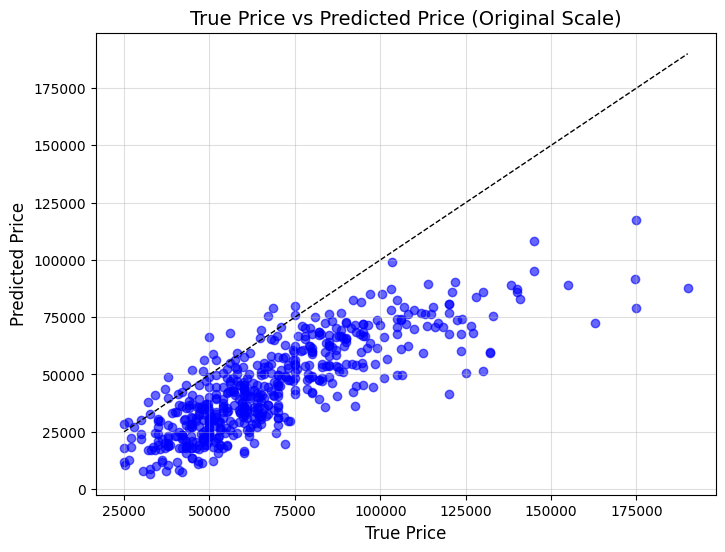

In [525]:
# True Price(y) vs Predicted Price(y_pred) in Original Scale
plt.figure(figsize=(8, 6))
plt.scatter(y, y_prediction, alpha=0.6, color='blue')

# Line of perfect prediction (y = y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='black', linewidth=1)

plt.title("True Price vs Predicted Price (Original Scale)", fontsize=14)
plt.xlabel("True Price", fontsize=12)
plt.ylabel("Predicted Price", fontsize=12)
plt.grid(alpha=0.4)
plt.show()


#2. Binary classification with logistic regression

Reference: ''https://github.com/Benlau93/Machine-Learning-by-Andrew-Ng-in-Python/blob/master/LogisticRegression/ML_LogisticRegression.ipynb ''

In [526]:
heart_disease_test= pd.read_csv("heart_disease_test.csv")
heart_disease_test.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,56,1.0,0,0.0,0.0,0,1,1,273.0,136.0,80.0,27.73,90.0,210.0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80.0,NaN,0
3,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
4,1,69,1.0,1,1.0,0.0,0,0,0,245.0,123.0,77.0,26.58,70.0,81.0,1


In [527]:
heart_disease_train=pd.read_csv("heart_disease_train.csv")
heart_disease_train.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


In [528]:
heart_disease_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3306 non-null   float64
 3   currentSmoker    3390 non-null   int64  
 4   cigsPerDay       3365 non-null   float64
 5   BPMeds           3348 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3346 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3374 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3075 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 423.9 KB


In [529]:
heart_disease_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           848 non-null    int64  
 1   age              848 non-null    int64  
 2   education        827 non-null    float64
 3   currentSmoker    848 non-null    int64  
 4   cigsPerDay       844 non-null    float64
 5   BPMeds           837 non-null    float64
 6   prevalentStroke  848 non-null    int64  
 7   prevalentHyp     848 non-null    int64  
 8   diabetes         848 non-null    int64  
 9   totChol          842 non-null    float64
 10  sysBP            848 non-null    float64
 11  diaBP            848 non-null    float64
 12  BMI              845 non-null    float64
 13  heartRate        848 non-null    float64
 14  glucose          775 non-null    float64
 15  TenYearCHD       848 non-null    int64  
dtypes: float64(9), int64(7)
memory usage: 106.1 KB


In [530]:
heart_disease_train.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3306.000000,3390.000000,3365.000000,3348.000000,3390.000000,3390.000000,3390.000000,3346.000000,3390.000000,3390.000000,3374.000000,3389.000000,3075.000000,3390.000000
mean,0.433628,49.614159,1.981246,0.486726,8.962556,0.028375,0.004720,0.302065,0.024779,236.759713,132.126696,82.752065,25.793874,75.776335,82.023089,0.152212
std,0.495648,8.609617,1.023009,0.499897,12.030447,0.166067,0.068548,0.459221,0.155473,45.347259,22.047822,11.933836,4.045690,11.952094,23.934546,0.359280
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.500000,74.500000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.500000,128.000000,82.000000,25.425000,75.000000,78.000000,0.000000
75%,1.000000,57.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,89.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [531]:
heart_disease_test.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,848.000000,848.000000,827.000000,848.000000,844.000000,837.000000,848.000000,848.000000,848.000000,842.000000,848.000000,848.000000,845.000000,848.000000,775.000000,848.000000
mean,0.411557,49.468160,1.969770,0.523585,9.164692,0.034648,0.010613,0.344340,0.029481,236.570071,133.254717,83.458726,25.834485,76.288915,81.743226,0.150943
std,0.492406,8.424758,1.007385,0.499738,11.475080,0.182995,0.102533,0.475433,0.169251,41.471282,21.989009,11.808590,4.217051,12.318492,24.074923,0.358205
min,0.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.000000,92.000000,48.000000,16.750000,45.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.875000,75.500000,23.060000,67.750000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,1.000000,1.500000,0.000000,0.000000,0.000000,0.000000,235.000000,129.000000,82.500000,25.310000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,261.750000,144.500000,90.000000,27.930000,85.000000,86.000000,0.000000
max,1.000000,69.000000,4.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,453.000000,215.000000,140.000000,51.280000,125.000000,325.000000,1.000000


In [532]:
heart_disease_train.isnull().sum()

,0
gender,0
age,0
education,84
currentSmoker,0
cigsPerDay,25
BPMeds,42
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,44


In [533]:
heart_disease_test.isnull().sum()

,0
gender,0
age,0
education,21
currentSmoker,0
cigsPerDay,4
BPMeds,11
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,6


In [534]:
# Train Features
X_train= heart_disease_train.drop(columns=['TenYearCHD'])
# Train Target
y_train= heart_disease_train['TenYearCHD']

In [535]:
X_train.shape

(3390, 15)

In [536]:
# Test Features
X_test= heart_disease_test.drop(columns=['TenYearCHD'])
# Test Target
y_test= heart_disease_test['TenYearCHD']

In [537]:
X_test.shape

(848, 15)

In [538]:
X_train.columns

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [539]:
X_train['gender'].unique()

array([1, 0])

In [540]:
X_train['age'].unique()

array([63, 45, 51, 50, 60, 61, 56, 53, 55, 36, 49, 65, 42, 54, 64, 59, 38,
       37, 57, 52, 48, 39, 41, 44, 47, 43, 69, 58, 66, 46, 40, 67, 68, 34,
       62, 33, 35, 70, 32])

In [541]:
X_train['education'].unique()

array([ 1.,  3.,  2.,  4., nan])

In [542]:
X_train['currentSmoker'].unique()

array([0, 1])

In [543]:
X_train['cigsPerDay'].unique()

array([ 0.,  2., 30.,  3., 20., 15., 35., 23., 10.,  1., nan, 11., 40.,
        5.,  9., 17., 16., 43., 12., 25.,  7.,  6.,  4., 50.,  8., 60.,
       18., 70., 13., 38., 14., 45., 19.])

In [544]:
X_train['BPMeds'].unique()

array([ 0.,  1., nan])

In [545]:
X_train['prevalentStroke'].unique()

array([0, 1])

In [546]:
X_train['prevalentHyp'].unique()

array([1, 0])

In [547]:
X_train['diabetes'].unique()

array([0, 1])

In [548]:
X_train['totChol'].unique()

array([190., 162., 261., 250., 300., 168., 229., 238., 214., 254., 285.,
       174., 265., 205., 184., 243., 347., 240., 273., 216., 278., 159.,
       233., 263., 266., 255., 257., 275., 198., 173., 269., 310., 237.,
       225., 280., 161., 220., 165., 223., 286., 201., 270., 222., 197.,
       248., 239., 235., 226.,  nan, 246., 155., 232., 245., 150., 241.,
       333., 228., 256., 258., 272., 186., 354., 185., 189., 187., 230.,
       175., 282., 305., 167., 242., 172., 204., 308., 194., 320., 290.,
       262., 206., 304., 340., 210., 279., 212., 211., 288., 284., 336.,
       154., 195., 208., 170., 372., 227., 219., 234., 318., 268., 271.,
       215., 207., 277., 317., 361., 200., 152., 295., 252., 306., 218.,
       309., 179., 291., 224., 249., 260., 221., 202., 231., 113., 251.,
       144., 292., 329., 193., 192., 311., 314., 199., 276., 180., 302.,
       335., 259., 213., 274., 281., 264., 171., 181., 253., 346., 244.,
       334., 303., 267., 164., 157., 217., 209., 23

In [549]:
X_train['sysBP'].unique()

array([148. , 125. , 127. , 126. , 130. , 134. , 120. , 144. , 119. ,
       115. , 160. , 158. , 131. , 150. , 106. , 114.5, 142. , 157. ,
       146. , 123. , 205. , 120.5, 112. , 117.5, 149. , 117. , 118. ,
       113.5, 128. ,  97. , 141. , 136.5, 180. , 122. , 137. , 113. ,
       110. , 107.5, 108. , 151. , 139. , 121. , 143.5, 102. , 133.5,
       153. , 108.5, 143. , 167. , 130.5, 147. , 122.5, 118.5, 213. ,
       136. , 126.5, 164. , 133. , 166. , 129.5, 180.5, 116. , 115.5,
       124. , 135. , 147.5, 114. , 154. , 127.5, 109. , 145. , 102.5,
       142.5, 116.5, 162.5, 182. , 132. , 138. , 183. , 121.5, 129. ,
       111. ,  85. , 169. , 153.5, 107. , 161. , 132.5, 170. , 146.5,
       152. , 140. , 131.5, 162. , 156.5, 177. , 181. , 207. ,  90. ,
       164.5, 101. , 165. , 141.5, 163. , 123.5, 112.5, 105. ,  93.5,
       206. , 103.5,  96.5, 155. , 124.5, 193. , 184.5, 199. , 128.5,
       134.5, 159. , 161.5, 138.5, 190. , 151.5,  97.5, 103. , 100. ,
       175.5, 197. ,

In [550]:
X_train['diaBP'].unique()

array([ 90. ,  89. ,  81. ,  89.5,  80. ,  86.5,  91. ,  78. ,  92. ,
        98. ,  86. ,  77.5,  73. ,  76. ,  73.5,  92.5,  93. ,  69. ,
        71. ,  85. ,  75.5,  64. ,  83. ,  85.5, 114. ,  84. ,  97. ,
        79. ,  67. ,  72.5,  63.5, 109. ,  74.5,  82.5, 108. ,  96. ,
        96.5,  77. ,  74. ,  98.5,  82. , 133. ,  87. ,  67.5,  94.5,
        88. , 106.5,  78.5,  65. ,  72. ,  94. ,  75. ,  70. ,  93.5,
       101. ,  95. ,  66. ,  59.5,  79.5,  55. , 104. ,  87.5, 100. ,
       110. ,  57. , 122.5,  62. ,  81.5,  63. , 111. , 105. ,  58. ,
        57.5,  83.5, 102. ,  66.5,  84.5, 110.5,  99. ,  68. , 103. ,
        62.5, 113. , 118. , 112. ,  80.5, 107. ,  99.5, 106. ,  71.5,
       128. ,  59. ,  60. ,  76.5,  95.5,  70.5, 142.5, 132. ,  88.5,
        65.5,  97.5,  68.5, 130. , 108.5, 124. , 100.5,  61. , 101.5,
       115. ,  64.5,  61.5, 123. , 120. , 117. ,  50. , 105.5, 102.5,
       107.5,  69.5, 135. ,  91.5, 125. , 104.5, 119. ,  53. ,  52. ,
        90.5, 103.5,

In [551]:
X_train['BMI'].unique()

array([27.13, 27.98, 20.24, ..., 30.57, 30.61, 40.51])

In [552]:
X_train['heartRate'].unique()

array([ 72.,  85.,  75.,  90.,  96.,  70.,  80.,  60.,  66.,  65.,  88.,
        82.,  86.,  50., 120.,  68.,  73.,  52., 105.,  62.,  76.,  92.,
        67.,  78.,  83.,  94.,  63., 100.,  84.,  58.,  48.,  55.,  79.,
        71.,  64.,  56.,  69., 106.,  53.,  54.,  77.,  61., 110.,  81.,
        95.,  74.,  93.,  59.,  89.,  57., 108.,  99., 125.,  87.,  98.,
        45., 130.,  44., 122.,  91., 103.,  97.,  47., 143., 104., 107.,
       112., 102., 115., 140.,  51.,  nan])

In [553]:
X_train['glucose'].unique()

array([ 86.,  83.,  96.,  92.,  81.,  60.,  82.,  75., 292.,  80.,  88.,
        64., 107.,  87.,  59.,  67.,  70.,  84.,  78.,  66.,  nan,  72.,
        79., 118.,  76.,  61.,  90.,  74., 104.,  97., 103.,  57., 126.,
        73.,  85.,  62.,  68., 125.,  77.,  89.,  58.,  69.,  65.,  71.,
        98.,  95., 156.,  50., 110., 120., 112.,  55.,  93., 106.,  54.,
        99., 172.,  63., 102., 123., 115.,  94., 129., 100.,  91., 147.,
       170., 142.,  40.,  53., 206., 109., 113.,  47., 130., 215., 108.,
       155., 105.,  45., 348., 122., 127., 160., 297., 114., 370., 193.,
       145., 116., 223., 117.,  44., 216., 101., 386., 183.,  56., 163.,
       137.,  43., 332., 135., 150.,  48., 191., 119., 132., 143., 111.,
       268., 294., 260., 320., 235., 394., 368., 225., 173., 124., 140.,
       207., 136., 121., 254., 248., 177.,  52., 202., 144., 205.])

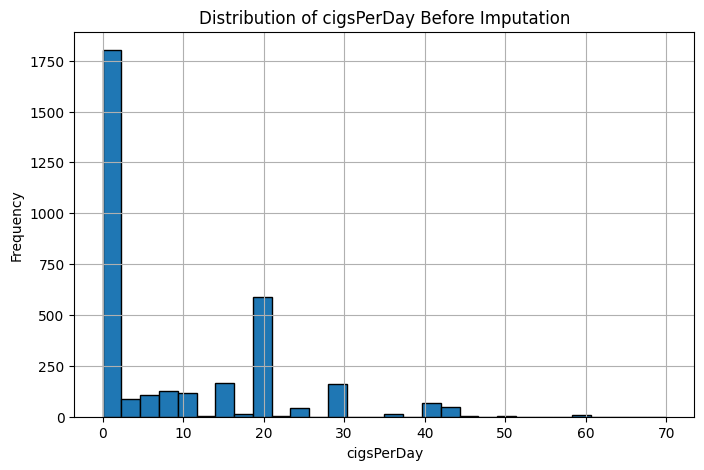

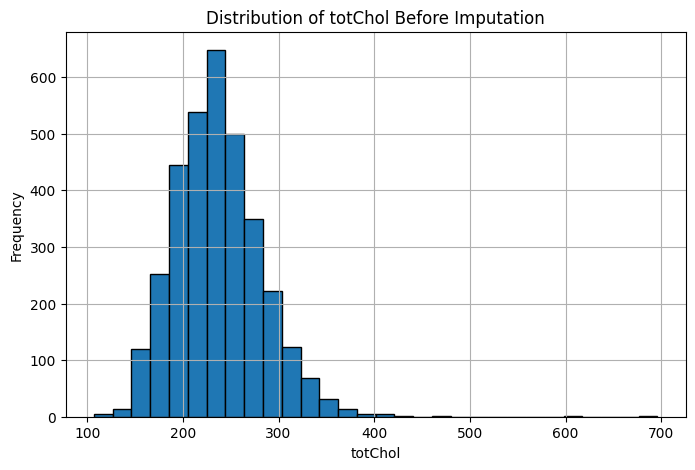

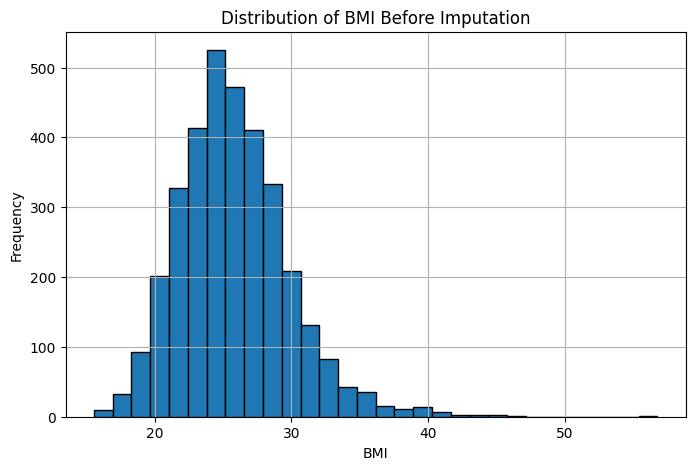

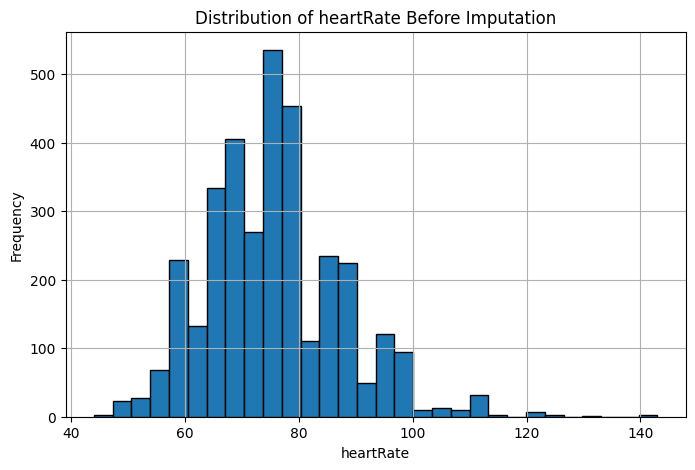

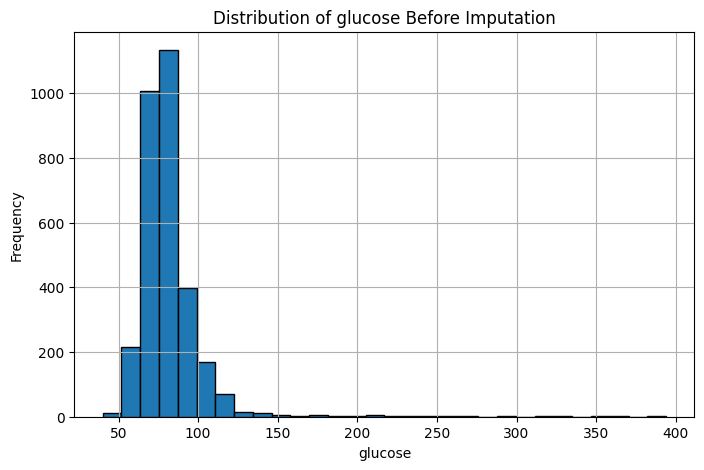

In [554]:
numerical_cols = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    X_train[col].hist(bins=30, edgecolor='k')
    plt.title(f'Distribution of {col} Before Imputation')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


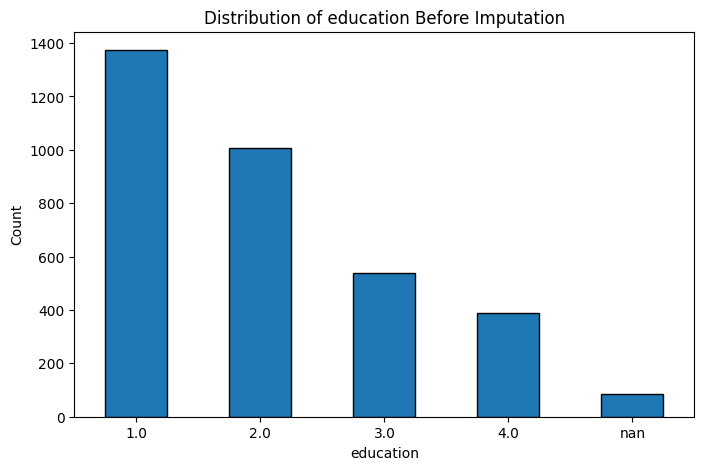

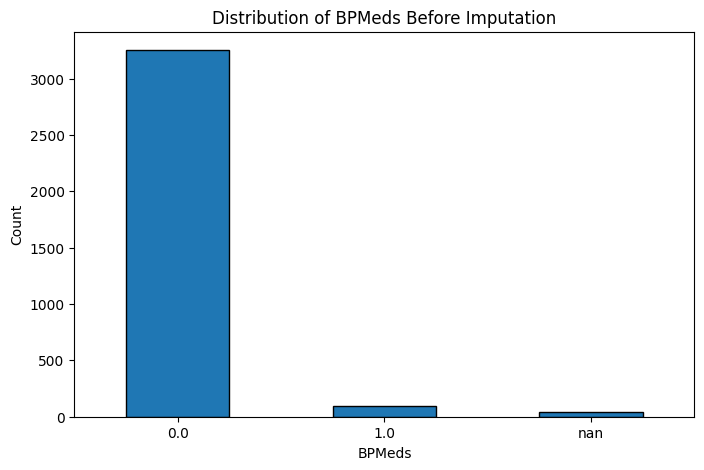

In [555]:
categorical_cols = ['education', 'BPMeds']
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    X_train[col].value_counts(dropna=False).sort_index().plot(kind='bar', edgecolor='k')
    plt.title(f'Distribution of {col} Before Imputation')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()


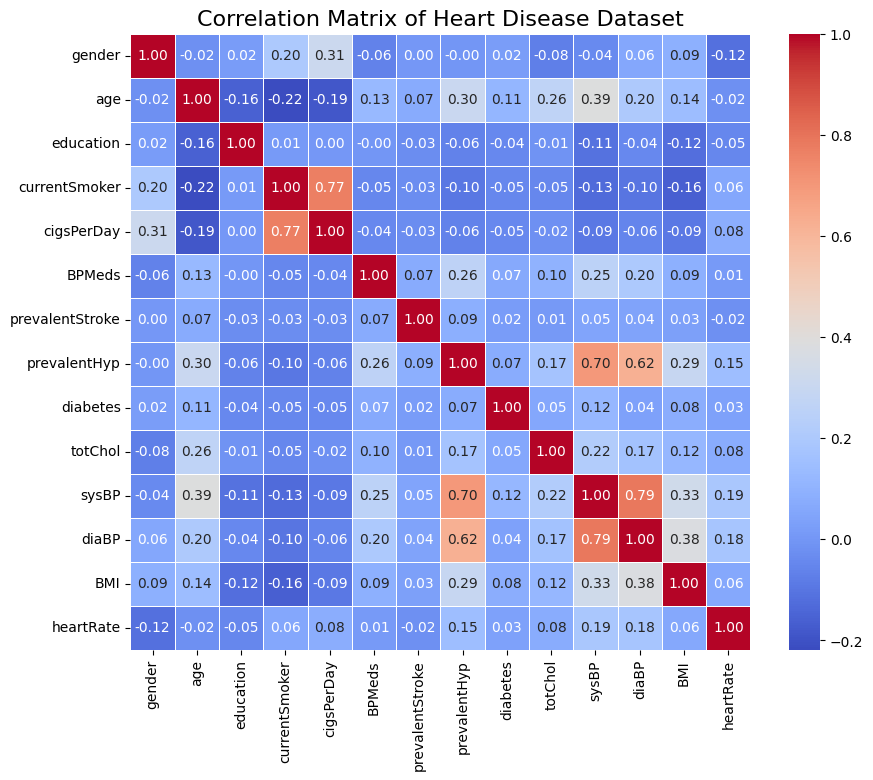

In [556]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = X_train.iloc[:, :-1].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Heart Disease Dataset", fontsize=16)
plt.show()


In [557]:
# Define age bins and labels
age_bins = [30, 40, 50, 60, 70, 80]
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79']

X_train['age_group'] = pd.cut(X_train['age'], bins=age_bins, labels=age_labels, right=False)

In [558]:
X_test['age_group'] = pd.cut(X_test['age'], bins=age_bins, labels=age_labels, right=False)

####Impute Missing education Values Within Subclasses (Age, Gender) across different demographics.

Since, education is categorical ordinal variable, we will use mode for null value treatment.


In [559]:
# Check education levels by age group and gender
education_counts = X_train.groupby(['gender', 'age_group'], observed=True)['education'].value_counts(normalize=True)
print(education_counts)


gender  age_group  education
0       30-39      2.0          0.469565
                   3.0          0.221739
                   1.0          0.191304
                   4.0          0.117391
        40-49      2.0          0.352151
                   1.0          0.348118
                   3.0          0.209677
                   4.0          0.090054
        50-59      1.0          0.454392
                   2.0          0.295608
                   3.0          0.182432
                   4.0          0.067568
        60-69      1.0          0.541401
                   2.0          0.235669
                   3.0          0.143312
                   4.0          0.079618
        70-79      1.0          0.500000
                   2.0          0.500000
1       30-39      2.0          0.422886
                   1.0          0.293532
                   4.0          0.179104
                   3.0          0.104478
        40-49      1.0          0.368705
                   2.0      

In [560]:
def impute_mode(series):
    mode = series.mode()
    if not mode.empty:
        return series.fillna(mode[0])
    else:
        return series

X_train['education'] = X_train.groupby(['gender', 'age_group'], observed=True)['education'].transform(impute_mode)


In [561]:
X_test['education'] = X_test.groupby(['gender', 'age_group'], observed=True)['education'].transform(impute_mode)


#### Impute cigsPerDay (Number of Cigarettes per Day) with subclass (currentSmoker, gender, age_group) across different demographics.

cigsPerDay distributions varies across age groups and genders.

In [563]:
# Set 'cigsPerDay' to 0 for non-smokers in training data
X_train.loc[X_train['currentSmoker'] == 0, 'cigsPerDay'] = 0

# For smokers, impute missing values
smokers = X_train['currentSmoker'] == 1
X_train.loc[smokers, 'cigsPerDay'] = X_train.loc[smokers].groupby(['gender', 'age_group'], observed=True)['cigsPerDay'].transform(
    lambda x: x.fillna(x.median())
)


In [564]:
X_test.loc[X_test['currentSmoker'] == 0, 'cigsPerDay'] = 0

# For smokers, impute missing values
test_smokers = X_test['currentSmoker'] == 1
X_test.loc[test_smokers, 'cigsPerDay'] = X_test.loc[test_smokers].groupby(['gender', 'age_group'], observed=True)['cigsPerDay'].transform(
    lambda x: x.fillna(x.median())
)


#### Impute BPMeds values Within Subclasses


Since, people with hypertension (prevalentHyp = 1) are more likely to take blood pressure medication, that's why we are considering prevalentHyp for BPMeds imputation across different demographics (gender, age_group)

In [565]:
X_train['BPMeds'] = X_train.groupby(['prevalentHyp', 'gender', 'age_group'], observed=True)['BPMeds'].transform(impute_mode)


In [566]:
X_test['BPMeds'] = X_test.groupby(['prevalentHyp', 'gender', 'age_group'], observed=True)['BPMeds'].transform(impute_mode)

#### Impute totChol values Within Subclasses across different demographics


Skewness is not in between -0.5 and 0.5,we will use median for imputation


In [567]:
skewness = X_train['totChol'].skew()
print(f"Skewness: {skewness}")


Skewness: 0.9198803304713254


In [568]:
X_train['totChol'] = X_train.groupby(['gender', 'age_group'], observed=True)['totChol'].transform( lambda x: x.fillna(x.median()))

In [569]:
X_test['totChol'] = X_test.groupby(['gender', 'age_group'], observed=True)['totChol'].transform( lambda x: x.fillna(x.median()))

#### Impute BMI values Within Subclasses across different demographics


In [570]:
X_train['BMI'] = X_train.groupby(['gender', 'age_group'], observed=True)['BMI'].transform(lambda x: x.fillna(x.median()))


In [571]:
X_test['BMI'] = X_test.groupby(['gender', 'age_group'], observed=True)['BMI'].transform(lambda x: x.fillna(x.median()))

#### Impute glucose values Within Subclasses across different demographics


In [572]:
skewness = X_train['glucose'].skew()
print(f"Skewness: {skewness}")

Skewness: 6.508729461566254


In [573]:
X_train['glucose'] = X_train.groupby(['diabetes', 'gender', 'age_group'], observed=True)['glucose'].transform(lambda x: x.fillna(x.median()))


In [574]:
X_test['glucose'] = X_test.groupby(['diabetes', 'gender', 'age_group'], observed=True)['glucose'].transform(lambda x: x.fillna(x.median()))

#### Impute Heartrate

Since, there is only 1 missing value in heartrate column, we will simply use median imputation to fill null value

In [575]:
skewness = X_train['heartRate'].skew()
print(f"Skewness: {skewness}")

Skewness: 0.6562809631836425


In [576]:
X_train['heartRate'] = X_train['heartRate'].fillna(X_train['heartRate'].median())

In [577]:
X_train = X_train.drop(columns=['age_group'])

In [578]:
X_train.isnull().sum()

,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [579]:
X_test = X_test.drop(columns=['age_group'])

In [580]:
X_test.isnull().sum()

,0
gender,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


## Sigmoid function


In [581]:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

## Compute the Cost Function and Gradient


In [582]:
def costFunction(weights, X, y):
    """
    Return the logistic regression cost function and gradient
    """
    m = len(y)

    z = np.dot(X, weights)

    # Predicted probabilities using the sigmoid function
    predictions = sigmoid(z)

    # Compute the cost function J
    cost = -1 / m * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

    # Compute the gradient
    grad = 1 / m * np.dot(X.T, (predictions - y))

    return cost, grad


In [583]:
# Feature normalization function
def featureNormalization(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std

In [584]:
# Gradient descent function
def gradientDescent(X, y, weights, alpha, iterations):

    cost_history = []

    for i in range(iterations):
        cost, grad = costFunction(weights, X, y)
        weights -= alpha * grad
        cost_history.append(cost)
        print(f"Epoch {i+1}, Cost: {cost:.4f}")

    return weights, cost_history

In [585]:
# Normalize features
X_train, X_mean, X_std = featureNormalization(X_train)
X_test = (X_test - X_mean) / X_std

In [586]:
# Add bias term (intercept) to features
m, n = X_train.shape
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
y_train = y_train.to_numpy().reshape(m, 1)
X_test = np.append(np.ones((X_test.shape[0], 1)), X_test, axis=1)
y_test = y_test.to_numpy().reshape(X_test.shape[0], 1)

In [587]:
# Initialize parameters
initial_weight = np.zeros((X_train.shape[1], 1))

In [588]:
#Compute initial cost and gradient
cost, grad = costFunction(initial_weight, X_train, y_train)
print("Cost of initial weight:", cost)
print("Gradient at initial weight (zeros):", grad.flatten())

Cost of initial weight: 0.6931471805599453
Gradient at initial weight (zeros): [ 0.34778761 -0.03348083 -0.07755023  0.01427232 -0.00817371 -0.01917096
 -0.03671193 -0.02825373 -0.06047718 -0.03076829 -0.0308402  -0.07425456
 -0.04980093 -0.02156058 -0.01018448 -0.03619775]


In [607]:
# Train the logistic regression model
learning_rate = 0.2
iterations = 10
weights, cost_history = gradientDescent(X_train, y_train, initial_weight, learning_rate, iterations)

Epoch 1, Cost: 0.5736
Epoch 2, Cost: 0.5587
Epoch 3, Cost: 0.5453
Epoch 4, Cost: 0.5332
Epoch 5, Cost: 0.5222
Epoch 6, Cost: 0.5122
Epoch 7, Cost: 0.5032
Epoch 8, Cost: 0.4949
Epoch 9, Cost: 0.4873
Epoch 10, Cost: 0.4804


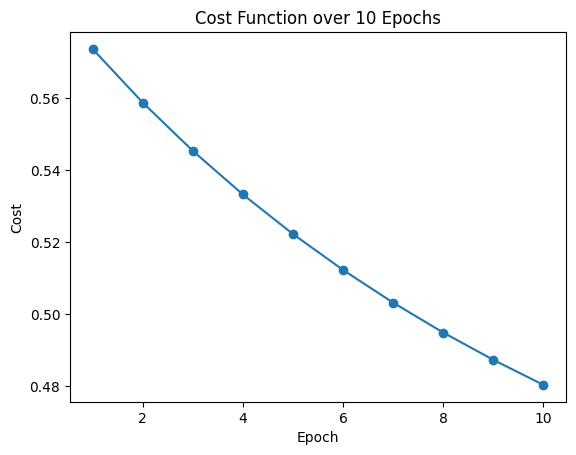

In [608]:
# Plot the cost function over epochs
plt.plot(range(1, iterations+1), cost_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function over 10 Epochs')
plt.show()

In [609]:
# Make predictions
def predict(X, weights, threshold=0.5):
    return (sigmoid(np.dot(X, weights)) >= threshold).astype(int)

y_train_pred = predict(X_train, initial_weight)
y_test_pred = predict(X_test, initial_weight)


In [610]:
# Compute confusion matrix and metrics
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

def compute_metrics(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    return accuracy, precision, recall

In [611]:
TP_train, TN_train, FP_train, FN_train = confusion_matrix(y_train, y_train_pred)
accuracy_train, precision_train, recall_train = compute_metrics(TP_train, TN_train, FP_train, FN_train)

print(f"Train Confusion Matrix:\nTP: {TP_train}, TN: {TN_train}, FP: {FP_train}, FN: {FN_train}")
print(f"Accuracy: {accuracy_train: .4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")

Train Confusion Matrix:
TP: 48, TN: 2821, FP: 53, FN: 468
Accuracy:  0.8463
Precision: 0.4752
Recall: 0.0930


In [612]:
TP_test, TN_test, FP_test, FN_test = confusion_matrix(y_test, y_test_pred)
accuracy_test, precision_test, recall_test = compute_metrics(TP_test, TN_test, FP_test, FN_test)

print(f"Test Confusion Matrix:\nTP: {TP_test}, TN: {TN_test}, FP: {FP_test}, FN: {FN_test}")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")

Test Confusion Matrix:
TP: 18, TN: 709, FP: 11, FN: 110
Accuracy: 0.8573
Precision: 0.6207
Recall: 0.1406
